# replot

- scatterplot -> kind='scatter' / (default)
- lineplot    -> kind='line'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Relating variables with scatter plots

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


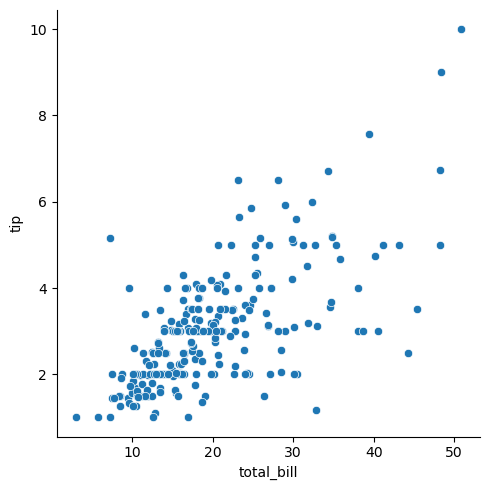

In [6]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    kind='scatter'
);

you can add another demention by adding `hue` argument:

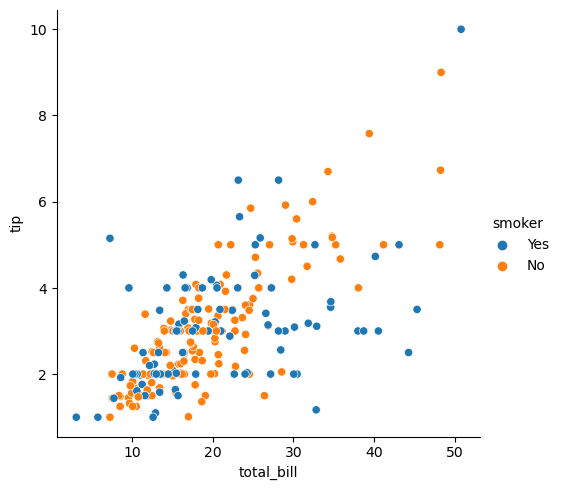

In [7]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    kind='scatter',
);

to emphesize this difference, you can use `style` :

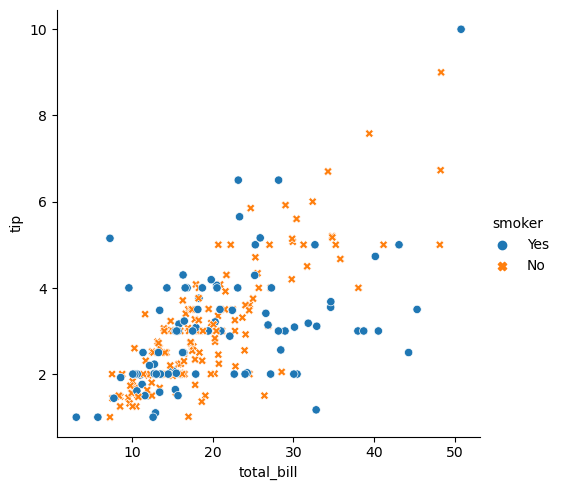

In [9]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    style='smoker',
    kind='scatter',
);

you can also use `style` on another variable, but this should be done with caution : 

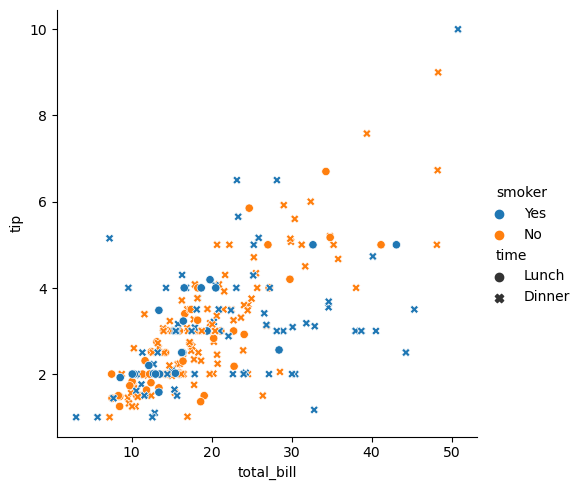

In [10]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    style='time',
    kind='scatter',
);

In the examples above, the hue semantic was **categorical**, so the default qualitative palette was applied. If the hue semantic is **numeric** (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

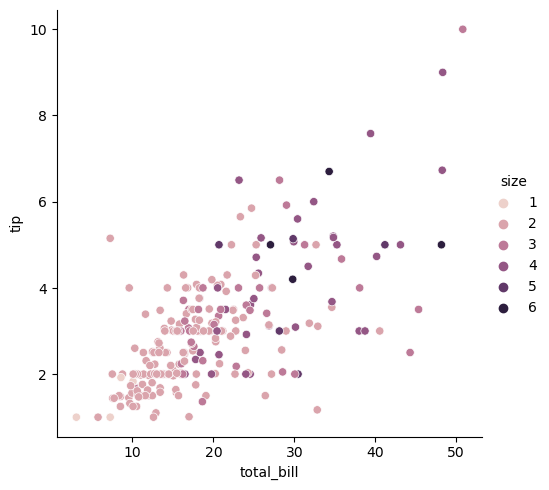

In [11]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size',
    kind='scatter',
);

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to `cubehelix_palette()`:

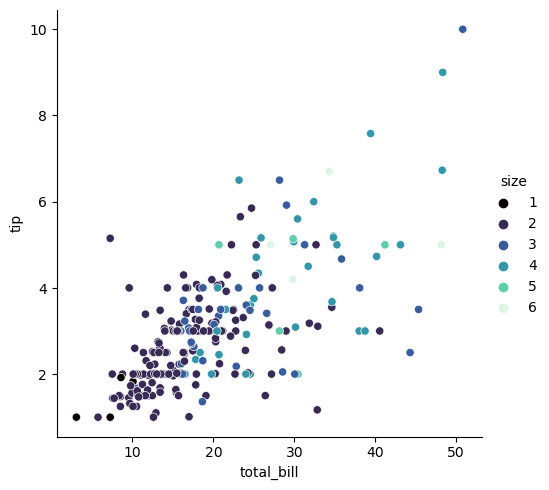

In [17]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size', palette='mako',
    kind='scatter',
);

The third kind of semantic variable changes the **size** of each point:

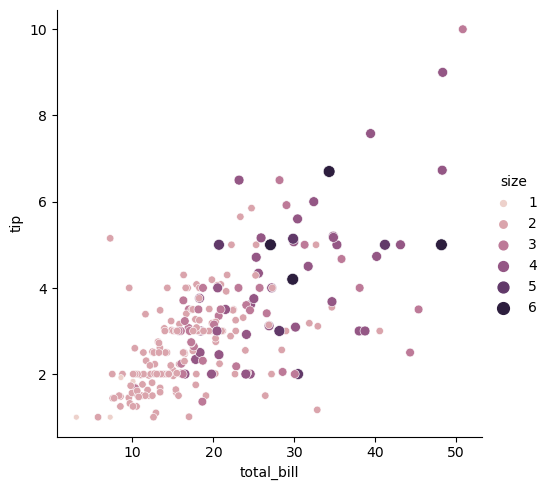

In [19]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size',
    size='size',
    kind='scatter',
);

Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

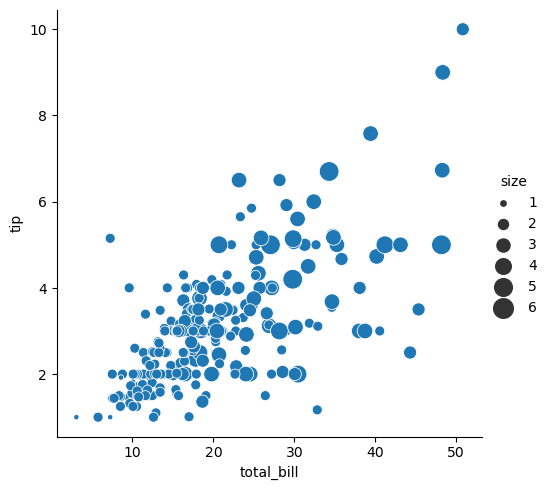

In [21]:
sns.relplot(
    data=tips, x='total_bill', y='tip',
    size='size', sizes=(15, 200)
)

### Emphasizing continutiy with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, **you may want to understand changes in one variable as a function of time**, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

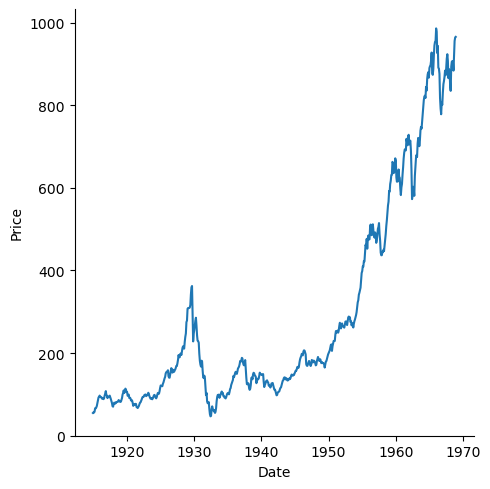

In [23]:
dowjones = sns.load_dataset('dowjones')
sns.relplot(
    data=dowjones, x='Date', y='Price', kind='line'
)

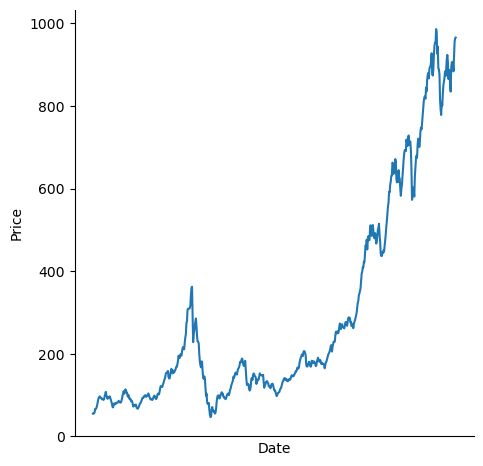

In [24]:
dowjones = sns.load_dataset('dowjones')
ax = sns.relplot(
    data=dowjones, x='Date', y='Price', kind='line'
)
ax.set(xticks=[])

### Aggregation and representing uncertainty 

In [25]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


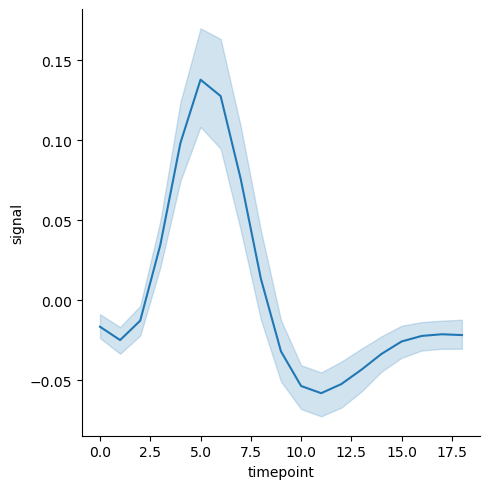

In [28]:
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line'
)

why does this happen?? let's check the dataset :

In [31]:
fmri['timepoint'].value_counts().sort_index()

0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: timepoint, dtype: int64

each time point has several valus

The confidence intervals are computed using bootstrapping, which can be **time-intensive** for larger datasets. It’s therefore possible to disable them:



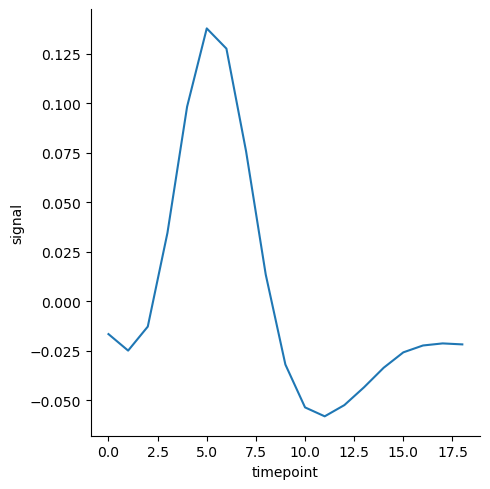

In [36]:
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', errorbar=None,
);

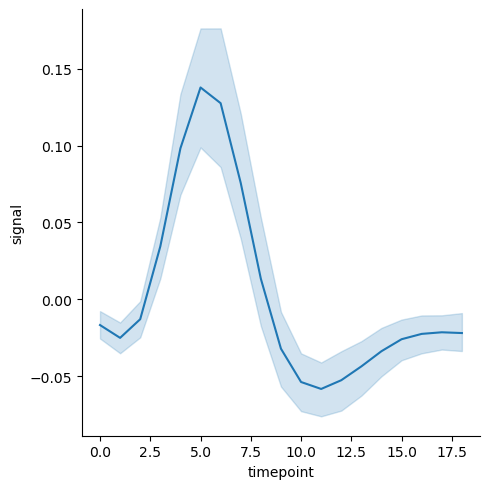

In [42]:
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', errorbar=('ci', 99),
);

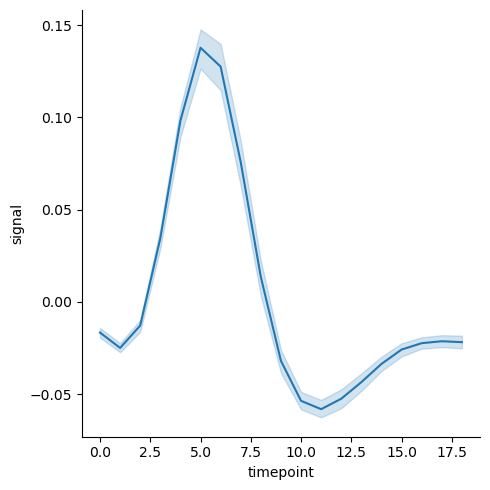

In [43]:
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', errorbar=('ci', 50),
);

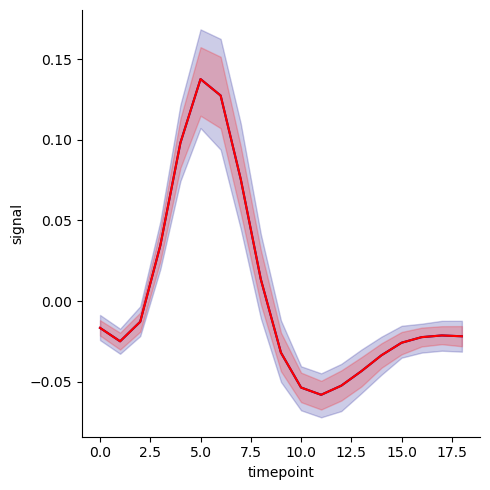

In [59]:
g = sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', errorbar=('ci', 95), color='darkblue',
);
g.map(
    sns.lineplot,
    data=fmri, x='timepoint', y='signal',
    errorbar=('ci', 80), color='red',
);

you can even set 'standard deviation' for it

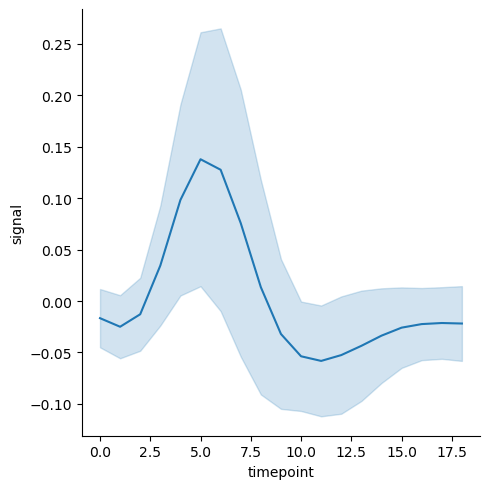

In [45]:
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', errorbar=('sd'), # standard deviation
);

To turn off aggregation altogether, set the **estimator** parameter to None This might produce a strange effect when the data have multiple observations at each point. :

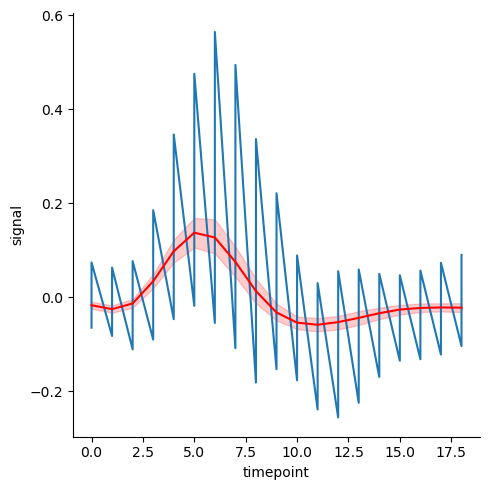

In [64]:
g = sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', estimator=None,
);

g.map( # the plot we previously drew :
    sns.lineplot,
    data=fmri, x='timepoint', y='signal',
    color='red',
);

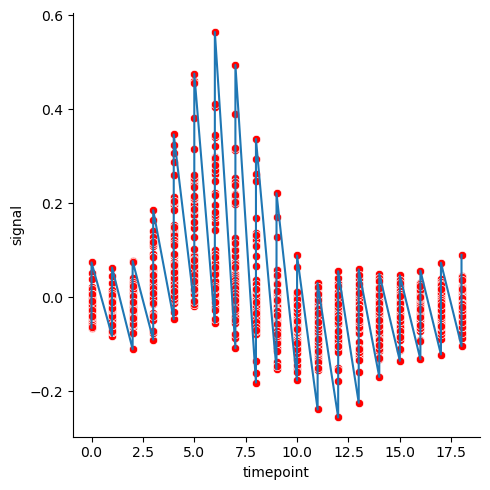

In [65]:
g = sns.relplot(
    data=fmri, x='timepoint', y='signal',
    kind='line', estimator=None,
);

g.map( # scatterplot of the points
    sns.scatterplot,
    data=fmri, x='timepoint', y='signal',
    color='red',
);

### plotting the subsets of data with semantic mapping 

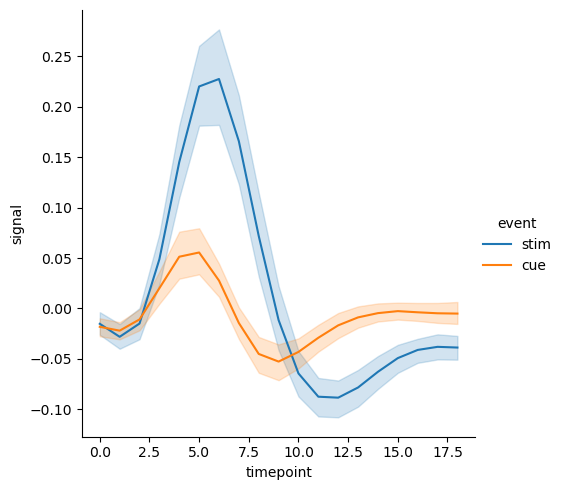

In [66]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:



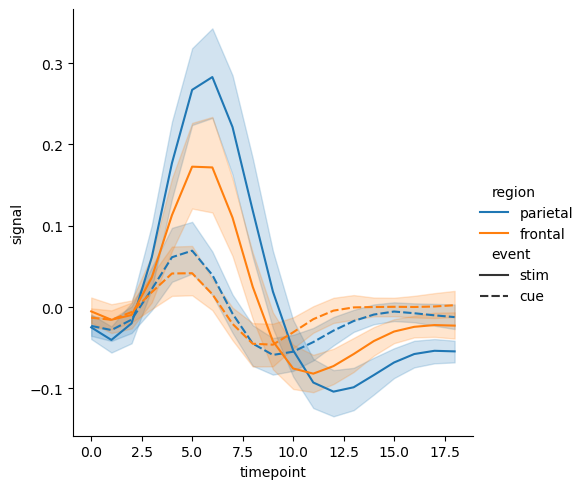

In [67]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style='event',
)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:



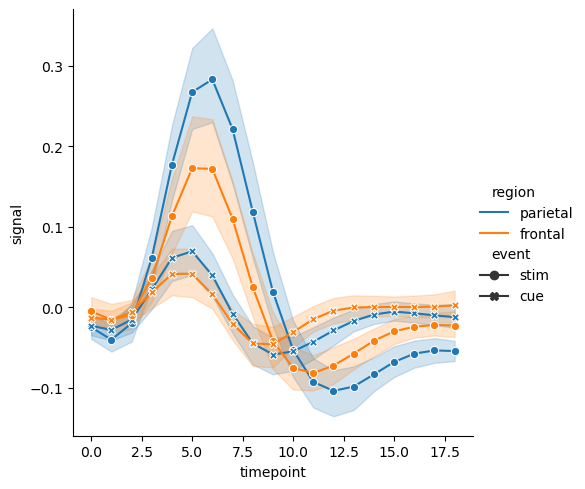

In [71]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style='event',
    dashes=False, markers=True,
)

___

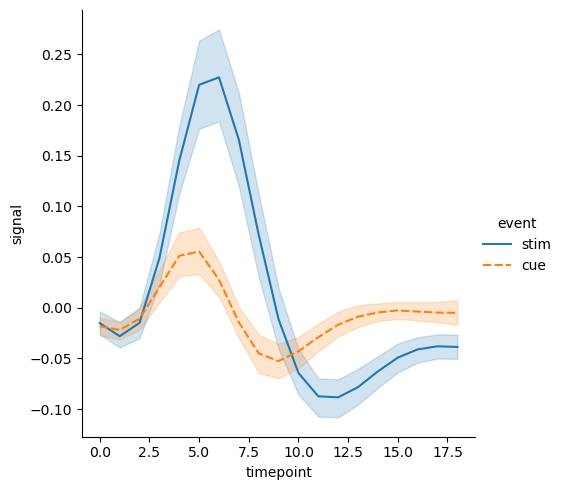

In [72]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', hue='event', style='event',
)


When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without
distinguishing them through semantics. This avoids cluttering the legend:

In [80]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


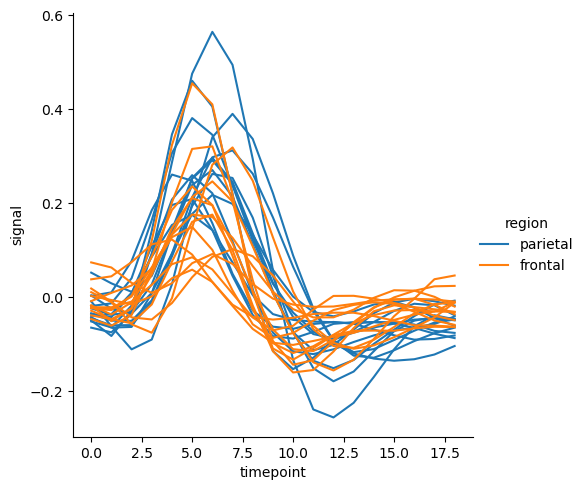

In [82]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

> When units is used, a separate line will be drawn for each unit with appropriate semantics, but no legend entry will be added. Useful for showing distribution of experimental replicates when exact identities are not needed.

<BR>

The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:



In [85]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


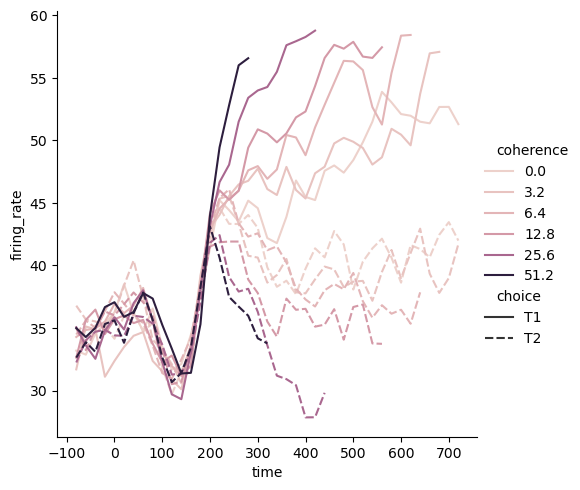

In [91]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

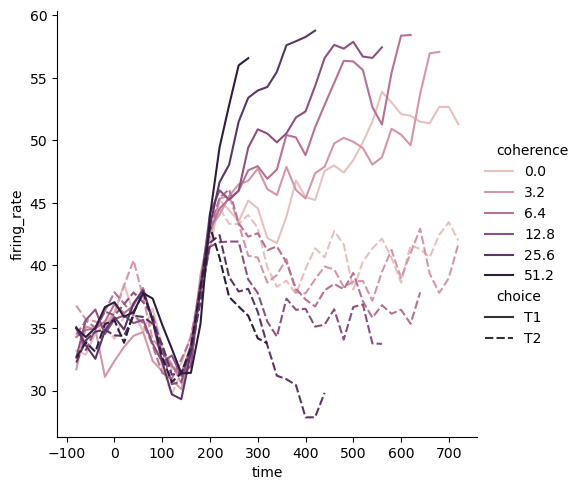

In [92]:
palette = sns.cubehelix_palette(light=0.8, n_colors=6)

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

Or you can alter how the colormap is normalized:



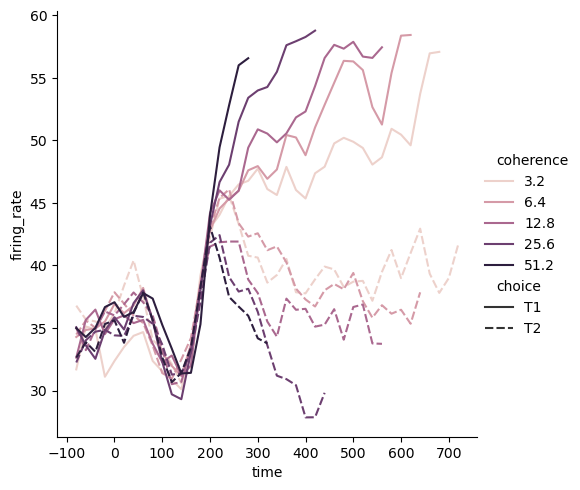

In [94]:
from matplotlib.colors import LogNorm

palette = sns.cubehelix_palette(light=.7, n_colors=6)

sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

The third semantic, size, changes the width of the lines:



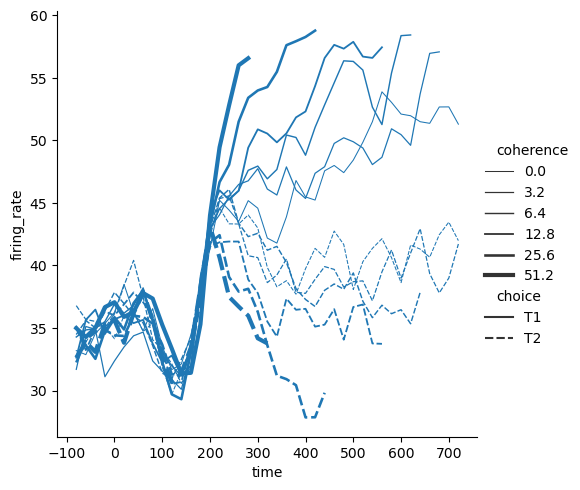

In [96]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

While the **size** variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

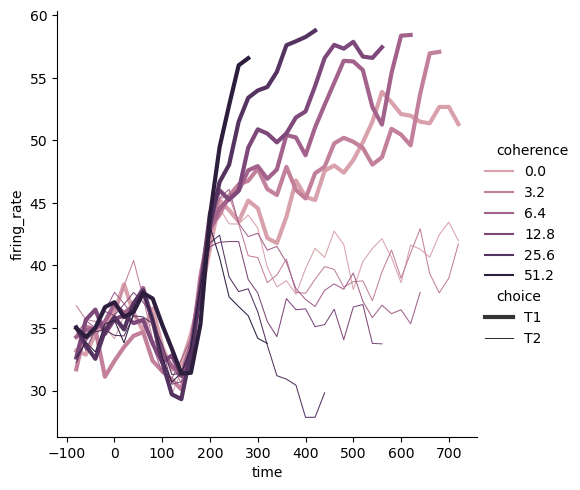

In [98]:
palette = sns.cubehelix_palette(light=.7, n_colors=6)

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

### Controlling sorting and orientation


Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to **sort the data by the x** values before plotting. However, this can be disabled:

In [103]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")

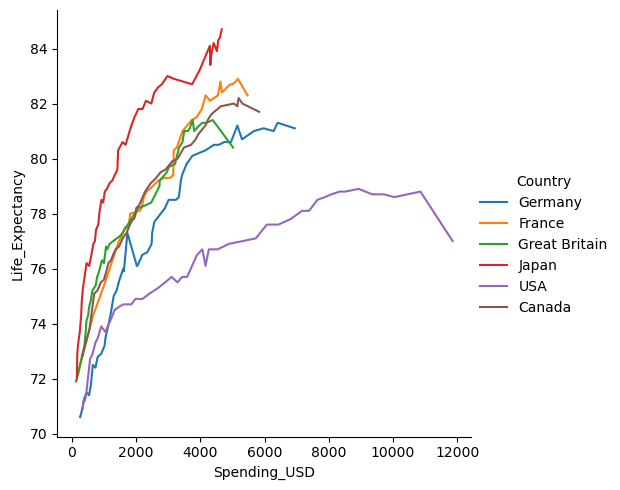

In [107]:
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
)

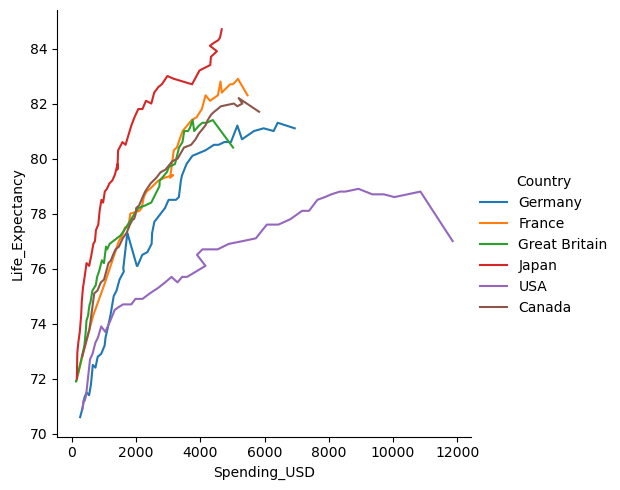

In [105]:
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

It’s also possible to sort (and aggregate) along the y axis:



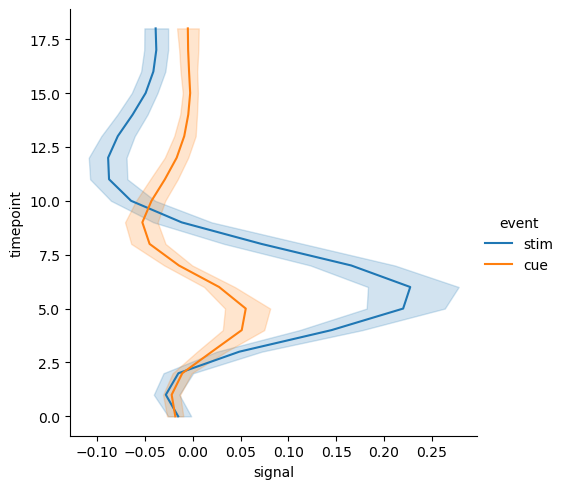

In [108]:
sns.relplot(
    data=fmri, kind="line",
    x="signal", y="timepoint", hue="event",
    orient="y",
)

### Showing multiple relationships with facets


We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

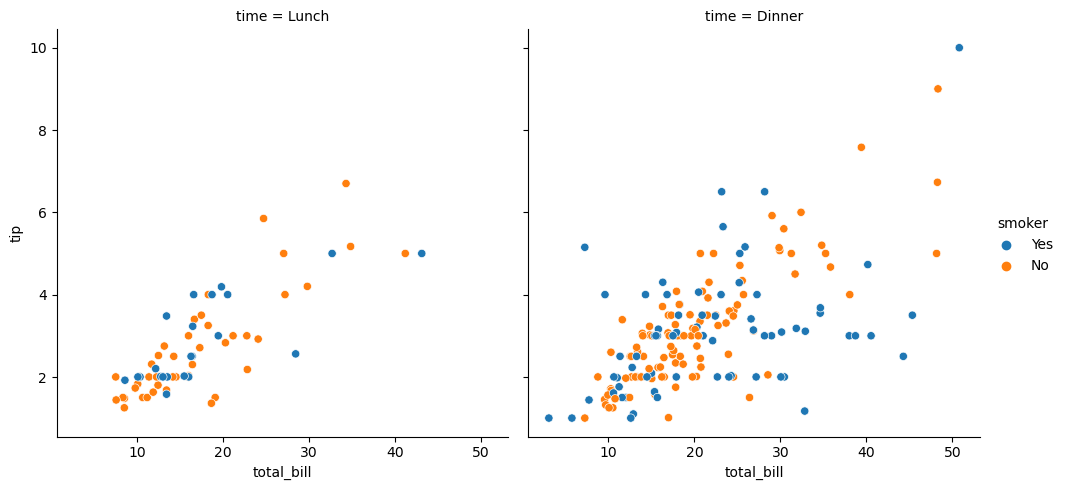

In [110]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

You can also show the influence of two variables this way: one by **faceting on the columns** and one by **faceting on the rows**. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

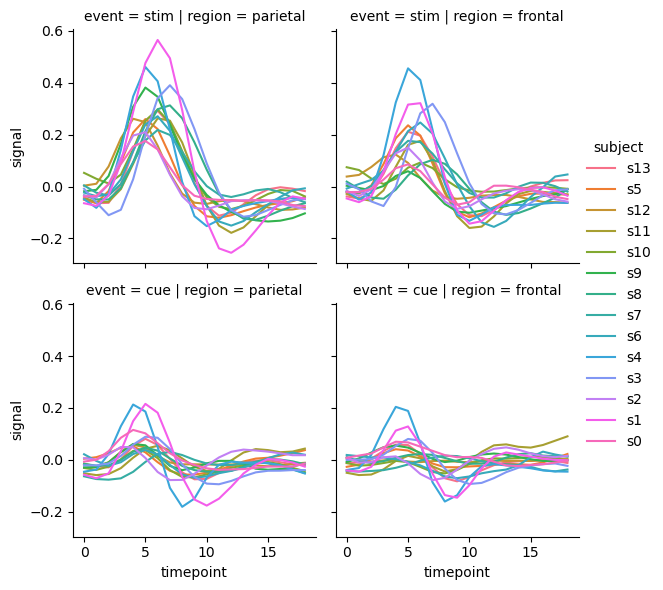

In [117]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

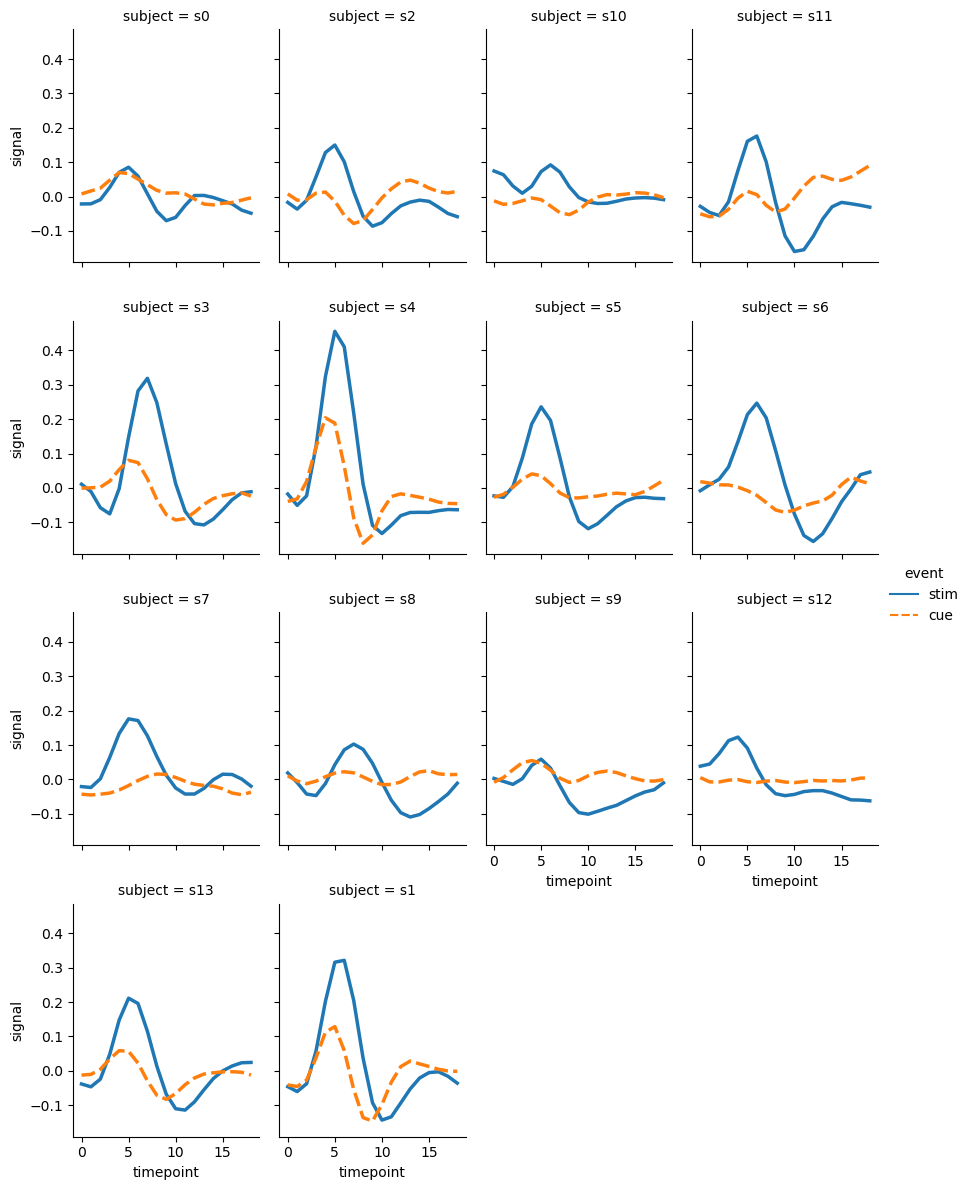

In [122]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=4, # each row has 4 columns
    height=3, aspect=0.75, linewidth=2.5,
);

These visualizations, which are sometimes called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by scatterplot() and relplot(), always try to keep in mind that several simple plots are usually more effective than one complex plot.